In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /Users/pawel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# EDA

In this part, we will make some basic insights into the dataset.
First, let's see the structure of dataset. There are 20491 hotel reviews together with ratings (scale from 1 to 5) that were given along with the reviews. Most of them are reviews with ratings "4" and "5".

In [3]:
raw = pd.read_csv('tripadvisor_hotel_reviews.csv')
raw.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [5]:
raw.shape

(20491, 2)

Rating
1    0.069348
2    0.087502
3    0.106583
4    0.294715
5    0.441853
Name: Rating, dtype: float64


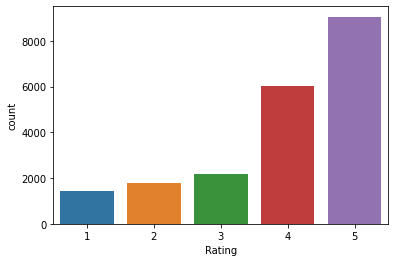

In [60]:
print(raw.groupby('Rating')['Rating'].count()/raw.shape[0])
sns.countplot(x='Rating', data=raw)
plt.show()

In [23]:
# preprocess function to clean texts
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"n't", ' not', text)
    text = re.sub(r"\W|[\r\n]+", ' ', text) # remove not-words and newlines
    text = re.sub(r"\s{2,}", ' ', text) # remove '.', ',' and doubled whitespaces
    
    tokenized = [word for word in text.split() if word not in stopwords.words('english')] # remove stopwords
    text = ' '.join(tokenized)
    return text

df = raw
df['Review'] = df['Review'].map(preprocess_text)
df['Review_length'] = df['Review'].map(lambda x: len(x.split()))

After preprocessing let's see the reviews' length (number of words). Most reviews (96%) are shorter than 300 words, the mean length is 101. There are many outliers - 2393.

In [68]:
print(f'Number of outliers: {df[df.Review_length > 1.5 * df.Review_length.quantile(0.75)].shape[0]}')

Number of outliers: 2393


Basic stats of Review lengths
 count    20491.000000
mean       101.292860
std         97.556186
min          6.000000
25%         47.000000
50%         75.000000
75%        120.000000
max       1898.000000
Name: Review_length, dtype: float64


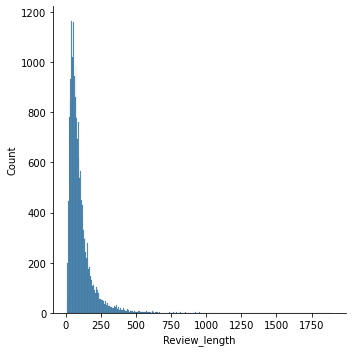

In [65]:
sns.displot(df['Review_length'])
print('Basic stats of Review lengths\n',df['Review_length'].describe())
plt.show()

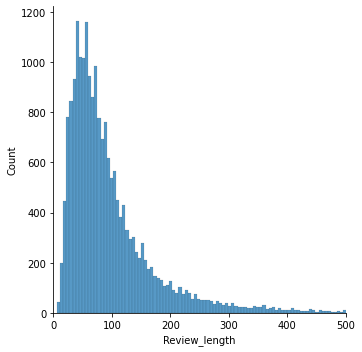

In [33]:
sns.displot(df['Review_length']).set(xlim=[0,500])
print()

In [35]:
x=df.groupby(df.Review_length < 300)['Review_length'].count()
print(x)
print(x[1]/(x.sum()))

Review_length
False      775
True     19716
Name: Review_length, dtype: int64
0.962178517397882


 


Let's check distributions of reviews lengths regarding Rating level. Lower ratings have much havier tails than the higher ones. Furthermore, distributions of lower-rated reviews are slightly shifted to the right. Among reviews with more than 300 words, ratings are more equally distributed.

In [73]:
df.groupby('Rating')['Review_length'].agg([np.mean, np.median])

,mean,median
Rating,,
1,107.110486,78
2,120.978806,91
3,110.478938,83
4,104.780593,76
5,91.939143,68


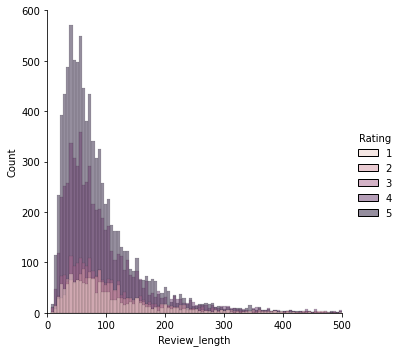

In [40]:
sns.displot(data=df, x='Review_length', hue='Rating').set(xlim=[0,500])

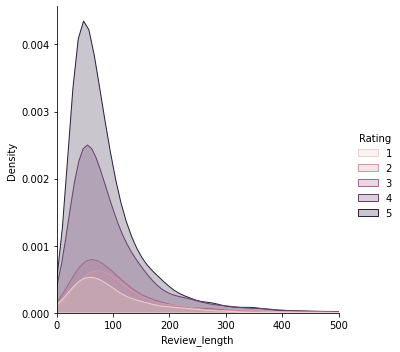

In [48]:
# denstity plot for better view of distribution
sns.displot(df, x="Review_length", hue="Rating", kind="kde", fill=True).set(xlim=[0,500])

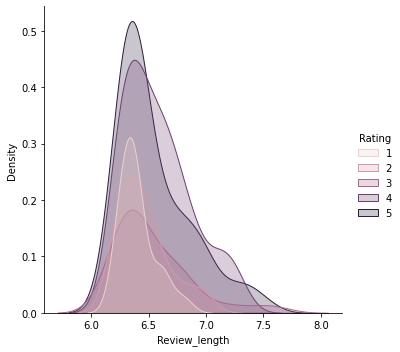

In [57]:
# distribution of the longest reviews, scaled with log
sns.displot(x=np.log(df.loc[df.Review_length>500, 'Review_length']), hue=df.loc[df.Review_length>500, 'Rating'], kind='kde', fill=True)